# Actividad 2

**pandas - 1.4.2**
**numpy - 1.22.3**
**matplotlib - 3.5.1**
**seaborn - 0.12.2**

**0.0. Importar Librerias**

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

**0.1. Pre-preparacion de Datos**

In [184]:
def prep_table(df, main_col, table_name=None):
    """
    Delimita los archivos de excel para poder capturar en el DataFrame el rango necesario. Tambien agrega una columna
    para diferenciar la tabla al concatenar

    Args:
        df(pd.DataFrame): Tabla cargada de pandas.
        main_col(str): Nombre del identificador unico de la tabla o columna que no tenga valores vacios.
        table_name(str): Nombre de la tabla
    Returns:
        df(pd.DataFrame): Tabla con el rango ideal.
    """
    #Identifica la columna donde se encuentra la columna principal
    column = df.columns[df.apply(lambda x: x[x==main_col]).notnull().values.ravel()][0]
    headers = df[df[column]==main_col] # Obtiene los encabezados correctos de la tabla
    df = df.iloc[headers.index[0]+1:]
    df.columns = list(map(lambda x: x.strip(),headers.values[0]))
    df = df.reset_index(drop=True)
    try:
        bottom = df[df[main_col].isna()].index[0]
        df = df.iloc[:bottom]
    except IndexError:
        pass

    if table_name is not None:
        df['tabla'] = table_name

    return df


def prep_itla(df_t):

    depts = df_t[df_t.Cargo.isnull()]['Nombre'].unique()
    index = df_t[df_t.Cargo.isna()].index.values
    cantidades = (index[1:] - index[:-1]) - 1
    cantidades = np.append(cantidades,np.array([len(df_t)-index[-1]-1]))
    serie = list(map(lambda x,y: [x]*y , depts, cantidades))
    serie =[item for lista in serie for item in lista]
    df_t = df_t[~df_t.Cargo.isnull()]
    df_t['departamento'] = serie

    return df_t

1. **Recopilacion y carga de informacion**

In [196]:
# Recopilación y carga de información

columns = ['nombre','departamento','cargo','sexo','sueldo_bruto','sueldo_neto', 'tabla']

sb = pd.read_excel('./data/nomina_sb.xlsx') # Carga de excel con pandas
sb = prep_table(sb,'Nombres','SB') # Preparacion del dataframe
sb.info()
sb = sb.rename(columns={'Nombres':'nombre',
                        'Departamento':'departamento',
                        'Posición Actual':'cargo',
                        'Género':'sexo',
                        'Sueldo Bruto':'sueldo_bruto',
                        'Sueldo  Neto':'sueldo_neto'}) # Renombramos las columnas que utilizaremos
sb = sb[columns] # Filtramos el dataframe con las columnas que utilizaremos

indotel = pd.read_excel('./data/nomina_indotel.xls')
indotel = prep_table(indotel, 'CARGO', 'INDOTEL')
indotel.info()
indotel = indotel.rename(columns={'NOMBRE Y APELLIDO':'nombre',
                                  'DIRECCION O DEPARTAMENTO':'departamento',
                                  'CARGO':'cargo',
                                  'GENERO':'sexo',
                                  'INGRESO BRUTO':'sueldo_bruto',
                                  'NETO':'sueldo_neto'})
indotel = indotel[columns]

salud = pd.read_excel('./data/nomina_unificada_sns_dic2023.xlsx')
salud = prep_table(salud, 'REG. NO.', 'SNS')
salud.info()
salud = salud.rename(columns={'NOMBRES':'nombre',
                              'DIRECCION O DEPARTAMENTO':'departamento',
                              'CARGO':'cargo',
                              'SEXO':'sexo',
                              'SUELDO BRUTO':'sueldo_bruto',
                              'SUELDO NETO':'sueldo_neto'})
salud = salud[columns]

itla = pd.read_excel('./data/nomina_itla.xlsx')
itla = prep_table(itla,'Nombre', 'itla')
itla = prep_itla(itla)
itla.info()
itla = itla.rename(columns={'Nombre':'nombre',
                                  'departamento':'departamento',
                                  'Cargo':'cargo',
                                  'Género':'sexo',
                                  'Total Ing.':'sueldo_bruto',
                                  'Neto':'sueldo_neto'})
itla = itla[columns]

minerd = pd.read_excel('./data/nominas_docentes_minerd_norte_dic2023.xlsx')
minerd = prep_table(minerd, 'Reg/Dist', 'MINERD')
minerd.info()
minerd = minerd.rename(columns={'Nombres y Apellidos':'nombre',
                                'Departamento o Nombre del Centro':'departamento',
                                'Función':'cargo',
                                'Género':'sexo',
                                'Total Ingreso':'sueldo_bruto',
                                'Sueldo Neto':'sueldo_neto'})
minerd = minerd[columns]

df = pd.concat([sb, indotel, salud, itla, minerd], axis=0) # Apendizamos todas las tablas ya filtradas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 738 entries, 0 to 737
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Nombres          738 non-null    object
 1   Departamento     738 non-null    object
 2   Posición Actual  738 non-null    object
 3   Género           738 non-null    object
 4   Estatus          738 non-null    object
 5   Sueldo Bruto     738 non-null    object
 6   Deducciones      738 non-null    object
 7   Sueldo  Neto     738 non-null    object
 8   tabla            738 non-null    object
dtypes: object(9)
memory usage: 52.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   NOMBRE Y APELLIDO         684 non-null    object
 1   CARGO                     684 non-null    object
 2   DIRECCION O DEPARTAMENTO  684 non-

C:\Users\lenovo\AppData\Local\Temp\ipykernel_25620\3207898952.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t['departamento'] = serie
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41219 entries, 0 to 41218
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Reg/Dist                          41219 non-null  object
 1   Nombres y Apellidos               41219 non-null  object
 2   Departamento o Nombre del Centro  41219 non-null  object
 3   Personal de Carrera               41219 non-null  object
 4   Función                           41219 non-null  object
 5   Estatus                           41219 non-null  object
 6   Total Ingreso                     41219 non-null  object
 7   ISR                               41219 non-null  object
 8   Seguro Vida                       41219 non-null  object
 9   AFP                               41219 non-null  object
 10  Aportes AFP                       41219 non-null  object
 11  Riesgo Laboral                    41219 non-null  object
 12  SFS               

**2. Análisis de la calidad de datos**

In [197]:
# Vista general de los datos
display(df.head())
df.info()

,nombre,departamento,cargo,sexo,sueldo_bruto,sueldo_neto,tabla
0,ALEJANDRO EDUARDO FERNANDEZ WHIPPLE,DESPACHO SUPERINTENDENTE,SUPERINTENDENTE DE BANCOS,M,1145184,762548.13,SB
1,OLIVIA A. ORTIZ DE ACOSTA,DESPACHO SUPERINTENDENTE,SUBDIRECTOR DEL DESPACHO,F,264055,193346.36,SB
2,MARIA ELIZABETH RODRIGUEZ MARTINEZ,DESPACHO SUPERINTENDENTE,ASESOR TECNICO DEL SUPERINTENDENTE,F,263240,197329.23,SB
3,HAYDEELINE MARTE GUZMAN,DESPACHO SUPERINTENDENTE,ENCARGADO DE DIVISION DEL DESPACHO,F,177920,129769.97,SB
4,SILVIA BERENICE TEJEDA GARCIA,DESPACHO SUPERINTENDENTE,ASISTENTE DEL SUPERINTENDENTE,F,122846,87137.37,SB


<class 'pandas.core.frame.DataFrame'>
Int64Index: 119797 entries, 0 to 41218
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   nombre        119797 non-null  object
 1   departamento  119222 non-null  object
 2   cargo         119797 non-null  object
 3   sexo          119797 non-null  object
 4   sueldo_bruto  119797 non-null  object
 5   sueldo_neto   119797 non-null  object
 6   tabla         119797 non-null  object
dtypes: object(7)
memory usage: 7.3+ MB


In [198]:
# Contar la cantidad de celdas nulas por columna

print(df.isnull().sum())
print("Cantidad de celdas nulas por campo:")


nombre            0
departamento    575
cargo             0
sexo              0
sueldo_bruto      0
sueldo_neto       0
tabla             0
dtype: int64
Cantidad de celdas nulas por campo:


In [199]:
# Asegurarse que no existen valores duplicados por nomina.

duplicates = df.duplicated(subset=['nombre', 'departamento', 'cargo', 'sexo', 'sueldo_bruto', 'sueldo_neto', 'tabla'], keep=False)

if duplicates.any():
    # Imprime las filas duplicadas
    print("Se encontraron duplicados:")
    print(df[duplicates])
    df = df.drop_duplicates()
else:
    print("No se encontraron duplicados.")


No se encontraron duplicados.


In [200]:
# Verificar y corregir celdas mal formateadas en campos específicos

# Sueldo_bruto y sueldo_neto a numérico
df['sueldo_bruto'] = pd.to_numeric(df['sueldo_bruto'], errors='coerce')
df['sueldo_neto'] = pd.to_numeric(df['sueldo_neto'], errors='coerce')

# Sexo a categoría (asegurándose de que solo hay dos categorías posibles)
df['sexo'] = df['sexo'].astype('category')

# Departamento a cadena (si es necesario)
df['departamento'] = df['departamento'].astype(str)

# Verificar celdas mal formateadas en el campo 'nombre' (asegurándose de que solo contengan texto)
invalid_names = df[df['nombre'].str.contains(r'\d', na=False)]
print("Nombres con dígitos u otros caracteres no válidos:")
print(invalid_names)

df['nombre'] = df['nombre'].str.replace('YOCAST5A', 'YOCASTA')

if invalid_names.empty:
    print('Corregido')


Nombres con dígitos u otros caracteres no válidos:
                             nombre                    departamento  \
50493  YOCAST5A MARINA MATOS DUARTE  HOSPITAL PABLO ANTONIO PAULINO   

                cargo sexo  sueldo_bruto  sueldo_neto tabla  
50493  MEDICO GENERAL    F      70019.85     59451.03   SNS  


In [222]:
# Removemos la variable "nombre" ya que esta no nos servira en el resto del analisis

df = df.drop('nombre', axis=1)

**3. Analisis Estadistico Univariable**

*Variables numericas*

In [223]:
columnas_numericas = ['sueldo_bruto', 'sueldo_neto']

# Obtener estadísticas básicas para las columnas numéricas
df.describe()


,sueldo_bruto,sueldo_neto
count,1.197960e+05,119796.000000
mean,4.377587e+04,28304.233896
std,2.538718e+04,20814.894167
min,6.000000e+03,20.000000
25%,2.866500e+04,10458.830000
50%,4.122690e+04,25561.360000
75%,6.360752e+04,42731.510000
max,1.145184e+06,762548.130000


Existe una persona con un sueldo bruto de 0. Esto no es posible, por lo que asumiremos que es un error y eliminaremos este registro.

In [224]:
df = df[df.sueldo_bruto > 0]


# Obtener estadísticas básicas para las columnas numéricas
df[columnas_numericas].describe()

,sueldo_bruto,sueldo_neto
count,1.197960e+05,119796.000000
mean,4.377587e+04,28304.233896
std,2.538718e+04,20814.894167
min,6.000000e+03,20.000000
25%,2.866500e+04,10458.830000
50%,4.122690e+04,25561.360000
75%,6.360752e+04,42731.510000
max,1.145184e+06,762548.130000


---------------------Analisis descriptivo de variables numericas---------------------
----------------Resumen general----------------


,sueldo_bruto,sueldo_neto
count,1.197960e+05,119796.000000
mean,4.377587e+04,28304.233896
std,2.538718e+04,20814.894167
min,6.000000e+03,20.000000
25%,2.866500e+04,10458.830000
50%,4.122690e+04,25561.360000
75%,6.360752e+04,42731.510000
max,1.145184e+06,762548.130000



----------------Analisis por variable----------------
####################SUELDO_BRUTO####################

Analisis tabular


,rangos,fa,fr,fcum,fcumr
0,< 28784,30825,0.257312,30825,0.257312
1,< 51567,52735,0.440207,83560,0.697519
2,< 74351,24846,0.207403,108406,0.904922
3,< 97135,9713,0.081080,118119,0.986002
4,< 119918,1051,0.008773,119170,0.994775
5,< 142702,271,0.002262,119441,0.997037
6,< 165486,107,0.000893,119548,0.997930
7,< 188269,59,0.000493,119607,0.998423
8,< 211053,79,0.000659,119686,0.999082
9,< 233837,18,0.000150,119704,0.999232



Resumen numerico


count    1.197960e+05
mean     4.377587e+04
std      2.538718e+04
min      6.000000e+03
25%      2.866500e+04
50%      4.122690e+04
75%      6.360752e+04
max      1.145184e+06
Name: sueldo_bruto, dtype: float64


Analisis visual


<Figure size 640x480 with 0 Axes>

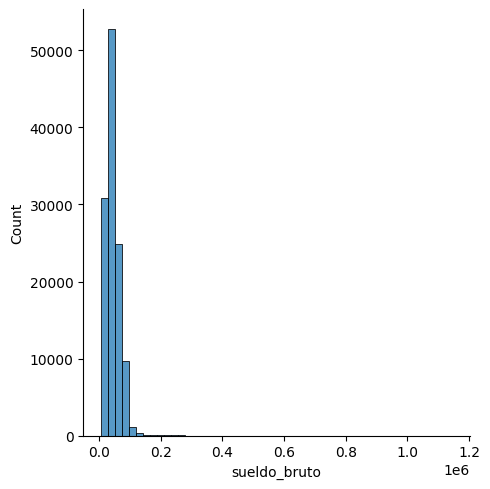



####################SUELDO_NETO####################

Analisis tabular


,rangos,fa,fr,fcum,fcumr
0,< 15271,40749,0.340153,40749,0.340153
1,< 30521,28689,0.239482,69438,0.579635
2,< 45772,28533,0.238180,97971,0.817815
3,< 61022,15695,0.131014,113666,0.948829
4,< 76273,4944,0.041270,118610,0.990099
5,< 91523,622,0.005192,119232,0.995291
6,< 106774,217,0.001811,119449,0.997102
7,< 122025,103,0.000860,119552,0.997962
8,< 137275,67,0.000559,119619,0.998521
9,< 152526,53,0.000442,119672,0.998963



Resumen numerico


count    119796.000000
mean      28304.233896
std       20814.894167
min          20.000000
25%       10458.830000
50%       25561.360000
75%       42731.510000
max      762548.130000
Name: sueldo_neto, dtype: float64


Analisis visual


<Figure size 640x480 with 0 Axes>

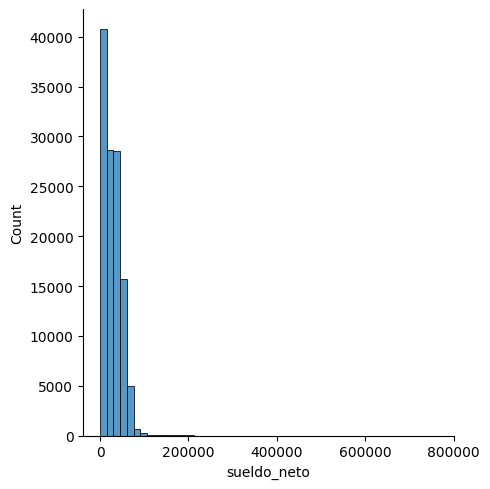

In [235]:
# Se utiliza el metodo de Freedman Diaconis para obtener la cantidad de bins en los que se dividirá el histograma y las tablas de frecuencia.

def tabla_frecuencias_num(serie, bins_='fd'):

  (n, bins, patches) = plt.hist(serie, bins=bins_)
  plt.clf()

  df_c = pd.DataFrame(
      {'rangos':
      map(lambda x: '< '+ str(round(x)) ,bins[1:]),
      'fa':map(round,n),
      'fr': map(lambda x: round(x/sum(n), 6), n)
      }
      )

  df_c['fcum'] = df_c.fa.cumsum()
  df_c['fcumr'] = df_c.fr.cumsum()

  return df_c


def resumen_numerico_num(serie):
  resultado = serie.describe()

  return resultado


#---Ejecucion
print('---------------------Analisis descriptivo de variables numericas---------------------')
print('----------------Resumen general----------------')
display(df.describe())
print('\n----------------Analisis por variable----------------')

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

for var_num in df.select_dtypes(numerics).columns:

  print(f'####################{var_num.upper()}####################\n')

  print('Analisis tabular')
  display(tabla_frecuencias_num(df[var_num], bins_=50))
  print('\nResumen numerico')
  display(resumen_numerico_num(df[var_num]))
  print('\nAnalisis visual')
  sns.displot(data=df, x=var_num, bins=50)
  plt.show()
  print('\n')

La distribucion de ambos salarios tiene un fuerte sesgo hacia la derecha. Esto se debe a que en el sector publico existen personas (directores, presidentes, etc) que tienen un salario mucho mayor al resto de personas. Aproximadamente el 70% de las personas tienen un salario bruto menor de 52 mil pesos, mientras que existen salarios de hasta mas de 500,000 pesos.

*Variables categoricas*

---------------------Analisis descriptivo de variables categoricas---------------------
----------------Resumen general----------------


,departamento,cargo,sexo,tabla
count,119796,119796,119796,119796
unique,5553,2066,2,5
top,HOSPITAL JOSE MARIA CABRAL Y BAEZ,AUXILIAR DE ENFERMERIA,F,SNS
freq,1763,12972,91997,76642



----------------Analisis por variable----------------
####################DEPARTAMENTO####################

Analisis tabular


,departamento,fa,fr
0,ADMINISTRATIVA,4,0.0000
1,COMPRAS Y CONTRATACIONES,11,0.0001
2,POLITECNICO JOSE ADON ADAMES ABREU 16-01,73,0.0006
3,ADMINISTRACION DEL TALENTO HUMANO,11,0.0001
4,ADMINISTRATIVO Y FINANCIERO,33,0.0003
...,...,...,...
5548,VILLA TABACALERA NAVARRETE,1,0.0000
5549,VILLA TABACALERA SANTIAGO,3,0.0000
5550,VOLUNTARIADO Y RESPONSABILIDAD SOCIAL,3,0.0000
5551,YAGUITA DE PASTOR,8,0.0001



Resumen numerico


,valor
Tamano de muestra,119796
Moda,HOSPITAL JOSE MARIA CABRAL Y BAEZ
Frecuencia modal,1763
Cardinalidad,5553
Categorias,"[DESPACHO SUPERINTENDENTE, DESPACHO INTENDENTE..."




####################CARGO####################

Analisis tabular


,cargo,fa,fr
0,ABOGADA,13,0.0001
1,ABOGADA DE CONTRATOS Y EJECUCION,1,0.0000
2,ABOGADA SENIOR,1,0.0000
3,ABOGADO,49,0.0004
4,ABOGADO DE AUTORIZACIONES,3,0.0000
...,...,...,...
2061,VICE-RECTOR (A) ADMINISTRATIVO (A),1,0.0000
2062,VICE-RECTOR(A),1,0.0000
2063,VIDEOGRAFO,1,0.0000
2064,VIGILANTE,3577,0.0299



Resumen numerico


,valor
Tamano de muestra,119796
Moda,AUXILIAR DE ENFERMERIA
Frecuencia modal,12972
Cardinalidad,2066
Categorias,"[SUPERINTENDENTE DE BANCOS, SUBDIRECTOR DEL DE..."




####################SEXO####################

Analisis tabular


,sexo,fa,fr
0,F,91997,0.7679
1,M,27799,0.2321



Resumen numerico


,valor
Tamano de muestra,119796
Moda,F
Frecuencia modal,91997
Cardinalidad,2
Categorias,"['M', 'F'] Categories (2, object): ['F', 'M']"



Analisis visual


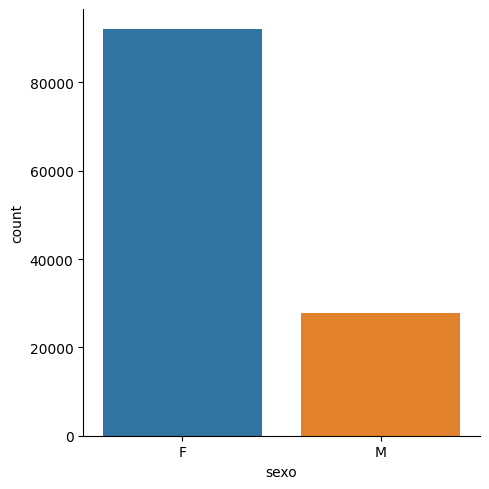



####################TABLA####################

Analisis tabular


,tabla,fa,fr
0,INDOTEL,683,0.0057
1,MINERD,41219,0.3441
2,SB,738,0.0062
3,SNS,76642,0.6398
4,itla,514,0.0043



Resumen numerico


,valor
Tamano de muestra,119796
Moda,SNS
Frecuencia modal,76642
Cardinalidad,5
Categorias,"[SB, INDOTEL, SNS, itla, MINERD]"



Analisis visual


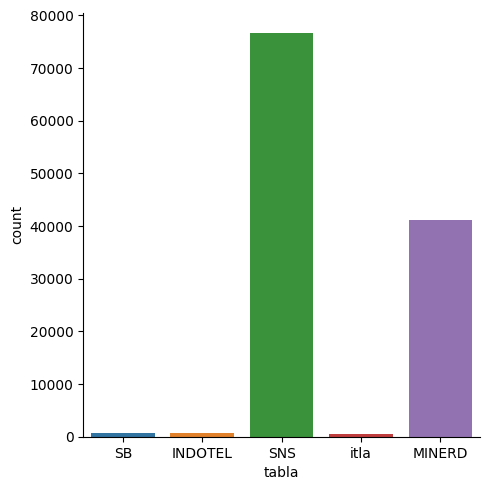

In [236]:
# Analisis variables categoricas

def tabla_frecuencias_cat(serie, es_ordinal = True):

  if es_ordinal:
    resultado = serie.value_counts().to_frame(name='fa').assign(
        fr=serie.value_counts(normalize=True).round(4),
        fcum=serie.value_counts().sort_index().cumsum(),
        fcumr=serie.value_counts(normalize=True).sort_index().cumsum().round(4)).sort_index().reset_index(name = 'count').rename(columns={'index':serie.name})
  else:
    resultado = serie.value_counts().to_frame(name='fa').assign(
        fr=serie.value_counts(normalize=True).round(4),
        ).sort_index().reset_index().rename(columns={'index':serie.name})
  return resultado


def resumen_numerico_cat(serie):
  resultado = pd.DataFrame.from_dict(
      {'Tamano de muestra': len(serie),
       'Moda':serie.mode()[0],
       'Frecuencia modal': len(serie[serie==serie.mode()[0]]),
       'Cardinalidad': serie.nunique(),
       'Categorias': serie.unique()
       },
      orient='index', columns=['valor'])

  return resultado


#---Ejecucion
print('---------------------Analisis descriptivo de variables categoricas---------------------')
print('----------------Resumen general----------------')
display(df.describe(include=['object', 'category']))
print('\n----------------Analisis por variable----------------')

for var_cat in df.select_dtypes(['object','category']).columns:

  print(f'####################{var_cat.upper()}####################\n')

  print('Analisis tabular')
  display(tabla_frecuencias_cat(df[var_cat], es_ordinal=False))
  print('\nResumen numerico')
  display(resumen_numerico_cat(df[var_cat]))
  
  if var_cat not in ('departamento', 'cargo'):
    print('\nAnalisis visual')
    sns.catplot(data=df, x=var_cat,kind='count')
    plt.show()
  print('\n')

-Entre las cinco instituciones existen mas de cinco mil departamentos y dos mil cargos distintos.

-Existe una gran diferencia de clases en la variable "tabla", esto debido a que las nominas del MINERD y la de SNS son muy grandes en comparación con el resto. Esto debe de considerarse para cualquier analisis futuro.

-Existe una diferencia significativa entre la cantidad de hombres y mujeres trabajando en estas instituciones, siendo las mujeres las que tienen la mayoria. Sin embargo, esto no necesariamente es asi apra todas las instituciones y puede deberse a la diferencia de clases de la variable "tabla".

# **4. Analizar estas distribuciones en conjunto con otras variables (dist. de ingreso por género, por cargo, por institución, entre otros)**

In [ ]:
# Extraer las dos variables numéricas de interés ("sueldo_bruto" y "sueldo_neto")
columnas_numericas = ["sueldo_bruto", "sueldo_neto"]
x = df[columnas_numericas[0]]
y = df[columnas_numericas[1]]

# Calcular la correlación de Pearson entre las dos variables
coef, pval = pearsonr(x, y)
print(f"El coeficiente de correlación de Pearson es {coef:.2f} y el valor p es {pval:.4f}")

# Graficar un scatterplot para visualizar la relación entre las variables
plt.scatter(x, y, s=50, c="blue", alpha=0.5)
plt.title("Relación entre sueldo bruto y sueldo neto")
plt.xlabel("Sueldo bruto")
plt.ylabel("Sueldo neto")
plt.show()

: 

In [ ]:
# Definir una función
def boxplot_con_media(x, y, data):
    # Crear un boxplot con la media
    sns.boxplot(x=x, y=y, data=data, showmeans=True, meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"}, meanline=False)
    # Agregar un título
    plt.title(f"{y} según {x}")
    # Agregar etiquetas
    plt.xlabel(x)
    plt.ylabel(y)
    # Mostrar el gráfico
    plt.show()

#Llamar la funcion
boxplot_con_media("sexo", "sueldo_bruto", df)
boxplot_con_media("tabla", "sueldo_bruto", df)